## Motivation

In [ ]:
dirRoot = '/store/dataset/zoom/X4/train'

subDirs = ['HR', 'LR']

file_name = '00006_00005.png'
import os
import numpy as np

HR_path = os.path.join(dirRoot, subDirs[0],file_name)
LR_path = os.path.join(dirRoot, subDirs[1],file_name)


from PIL import Image
HR_img = Image.open(HR_path)
LR_img = Image.open(LR_path)

d_HR = HR_img.resize(LR_img.size)
u_d_HR = d_HR.resize(HR_img.size)

u_LR = LR_img.resize(HR_img.size)


import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))

plt.subplot(331)
plt.title("LR")
plt.imshow(LR_img)

plt.subplot(332)
plt.title("HR")
plt.imshow(HR_img)

plt.subplot(333)
plt.title("HR")
plt.imshow(HR_img)

plt.subplot(334)
plt.title("downsample HR")
plt.imshow(d_HR)


plt.subplot(335)
plt.title("upsample LR")
plt.imshow(u_LR)

plt.subplot(336)
plt.title("upsample downsample HR")
plt.imshow(u_d_HR)

## difference between zoom and tranditional SR
LR_np = np.array(LR_img) / 255.0
d_HR_np = np.array(d_HR) / 255.0
min_img_t = np.abs(LR_np - d_HR_np)
min_img_t_scale = (min_img_t - np.min(min_img_t)) / (np.max(min_img_t) - np.min(min_img_t))

plt.subplot(337)
plt.title("LR - downsample_HR")
plt.imshow(min_img_t_scale)

## the lost information between zoom LR => HR 
HR_np = np.array(HR_img) / 255.0
u_LR_np = np.array(u_LR) / 255.0
loss_info = np.abs(HR_np - u_LR_np)
loss_info_scale = (loss_info - np.min(loss_info)) / (np.max(loss_info) - np.min(loss_info))

plt.subplot(338)
plt.title("HR - u_LR")
plt.imshow(loss_info_scale)

## the lost information between up-down HR => HR 
HR_np = np.array(HR_img) / 255.0
u_d_HR_np = np.array(u_d_HR) / 255.0
loss_info = np.abs(HR_np - u_d_HR_np)
loss_info_scale = (loss_info - np.min(loss_info)) / (np.max(loss_info) - np.min(loss_info))

plt.subplot(339)
plt.title("HR - u_d_HR")
plt.imshow(loss_info_scale)



#plt.savefig("motivation.pdf", format='pdf', transparent=False, dpi=512, pad_inches = 0)
plt.savefig("motivation.png", format='png', transparent=False, dpi=512, pad_inches = 0)


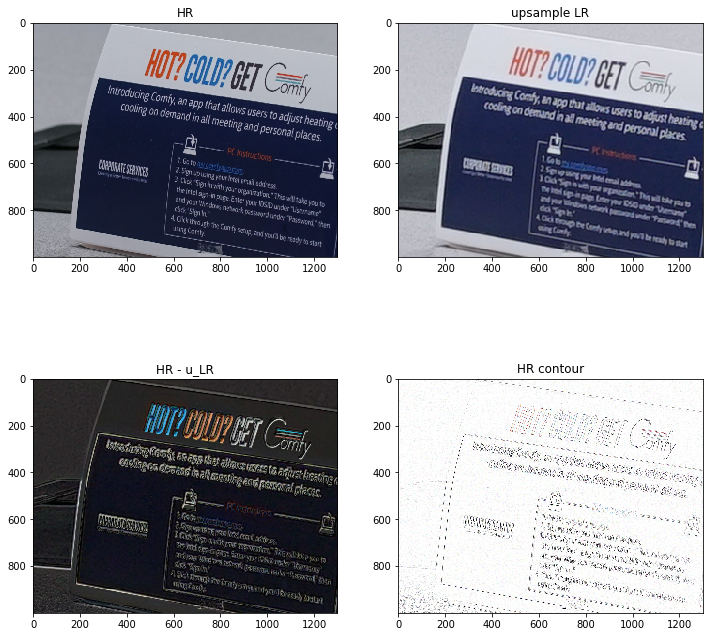

In [15]:
dirRoot = '/store/dataset/zoom/X4/train'

subDirs = ['HR', 'LR']

file_name = '00006_00005.png'
import os
import numpy as np

HR_path = os.path.join(dirRoot, subDirs[0],file_name)
LR_path = os.path.join(dirRoot, subDirs[1],file_name)


from PIL import Image
HR_img = Image.open(HR_path)
LR_img = Image.open(LR_path)

d_HR = HR_img.resize(LR_img.size)
u_d_HR = d_HR.resize(HR_img.size)


u_LR = LR_img.resize(HR_img.size)


import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))

box = (1200, 500, 2500, 1500)
HR_img = HR_img.crop(box)
u_LR = u_LR.crop(box)


plt.subplot(221)
plt.title("HR")
plt.imshow(HR_img)






plt.subplot(222)
plt.title("upsample LR")
plt.imshow(u_LR)





## the lost information between zoom LR => HR 
HR_np = np.array(HR_img) / 255.0
u_LR_np = np.array(u_LR) / 255.0
loss_info = np.abs(HR_np - u_LR_np)
loss_info_scale = (loss_info - np.min(loss_info)) / (np.max(loss_info) - np.min(loss_info))
loss_info_scale = Image.fromarray((loss_info_scale * 255).astype(np.uint8))

plt.subplot(223)
plt.title("HR - u_LR")
plt.imshow(loss_info_scale)


from PIL import ImageFilter
HR_contour = HR_img.filter(ImageFilter.CONTOUR).filter(ImageFilter.DETAIL)
HR_edge = HR_img.filter(ImageFilter.EDGE_ENHANCE_MORE)

difference = loss_info_scale.filter(ImageFilter.CONTOUR)

enhance_difference = Image.blend(loss_info_scale,u_LR,0.5)
plt.subplot(224)
plt.title("HR contour")
plt.imshow(HR_contour)

#plt.show()

#plt.savefig("motivation.pdf", format='pdf', transparent=False, dpi=512, pad_inches = 0)
plt.savefig("motivation.png", format='png', transparent=False, dpi=512, pad_inches = 0)

#HR_img.save("HR.png")
#u_LR.save("LR.png")
#Image.fromarray((loss_info_scale * 255).astype(np.uint8)).save("difference.png")

In [17]:
np.linspace(1,5,1)

array([1.])